# 1. Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
# OBS you can also implement your own Poisson pdf
# but for high lambdas there are issues because of the large numbers
from scipy.stats import poisson

# 2. ERDOS-RENYI NETWORKS

## 2.a. Tests

In [15]:
def ER_graph(N=1000,p=.5):
    # generate an Erdos-Renyi graph
    # N : vertices in the returned graph
    # p : probability of connection
    
    adj = np.zeros((N,N));
    # set elements to 1 with probability p
    adj[np.random.uniform(size=(N,N))<p]=1;
    # symmetrize
    adj = np.triu(adj)+np.transpose(np.triu(adj));
    # remove diagonal elements
    adj[range(0,N),range(0,N)] = 0;
    
    return nx.from_numpy_matrix(adj);

In [16]:
# On génère le graphe
N = 60; p = 0.06;
G_ER = ER_graph(N,p)

1


C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

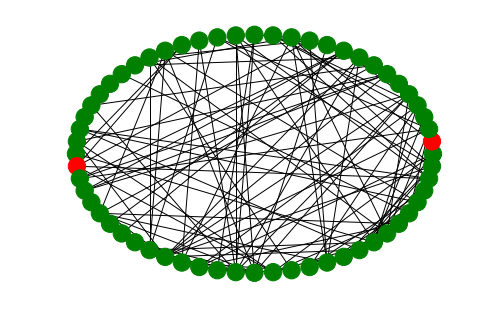

In [35]:
color_map = []
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
print (malade0)
for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    color_map.append('green') # du coup ils sont tous verts
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
color_map[malade0]='red' # sa couleur est donc rouge

nx.draw_circular(G_ER,node_color = color_map)
plt.show()

In [5]:
malades = []
malades.append(malade0)
for i in malades :
    voisins = G_ER.neighbors(i)
    print(voisins)
    for j in voisins:
        G_ER.node[j]['etat'] = 'malade'
        print(j)
print(len(voisins))
list(G_ER.nodes(data=True))
G_ER.edges(malade0)

[1, 13, 41, 58]
1
13
41
58
4


[(56, 1), (56, 13), (56, 41), (56, 58)]

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

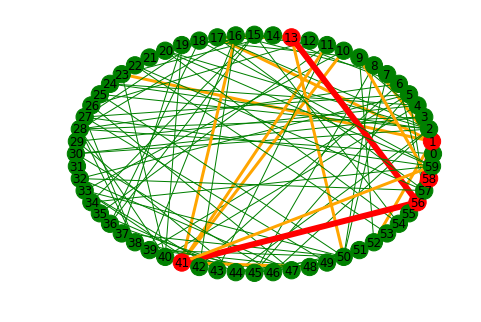

In [6]:
for i in range(N):
    if G_ER.node[i]['etat'] == 'malade':
        color_map[i] = 'red'
    else :
        color_map[i]='green'
        
for edge in range(len(G_ER.edges())):
    arrete = G_ER[G_ER.edges()[edge][0]][G_ER.edges()[edge][1]]
    arrete['color']='green' # toutes les arretes en jaune
    arrete['weight']=1
    if G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' :
        arrete['color']='red'# arrete rouge si les deux personnes sont malades
        arrete['weight']=6
    elif ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'sain' ) or ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'sain' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' ) :
        arrete['color']='orange' # les contaminations possibles en orange
        arrete['weight']=3


edges = G_ER.edges()
color_edges = [G_ER[u][v]['color'] for u,v in edges] #on recupere la liste des couleurs
weights = [G_ER[u][v]['weight'] for u,v in edges]

nx.draw_circular(G_ER,node_color = color_map,edge_color=color_edges, width = weights, with_labels = True)
plt.show()

## 2.b. Simulation

In [7]:
def ER_graph(N=1000,p=.5):
    # generate an Erdos-Renyi graph
    # N : vertices in the returned graph
    # p : probability of connection
    
    adj = np.zeros((N,N));
    # set elements to 1 with probability p
    adj[np.random.uniform(size=(N,N))<p]=1;
    # symmetrize
    adj = np.triu(adj)+np.transpose(np.triu(adj));
    # remove diagonal elements
    adj[range(0,N),range(0,N)] = 0;
    
    return nx.from_numpy_matrix(adj);

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

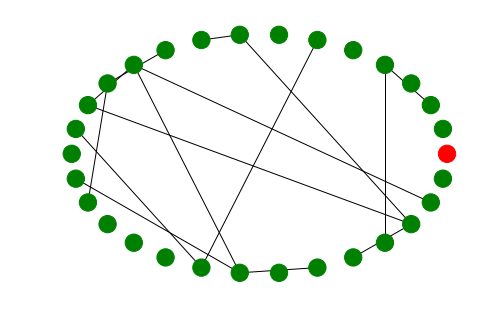

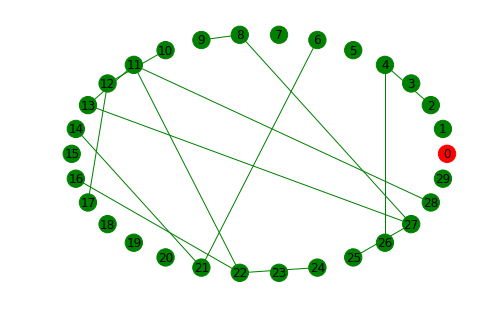

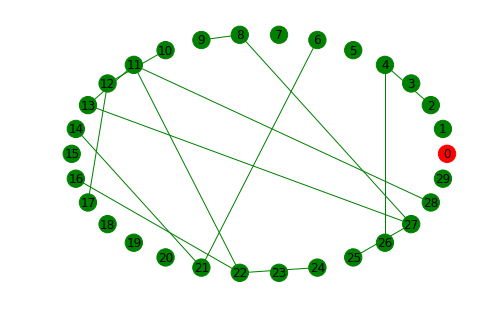

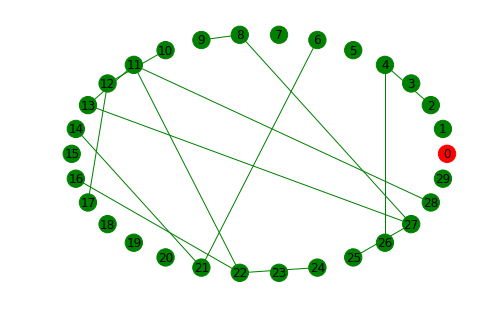

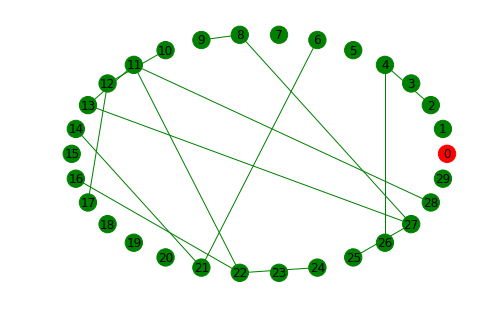

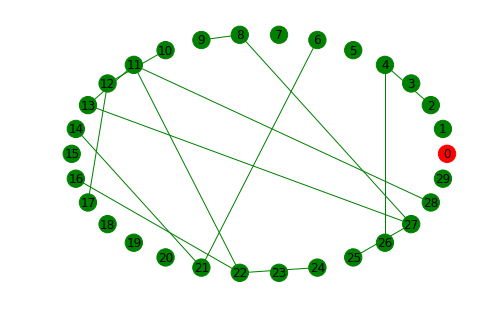

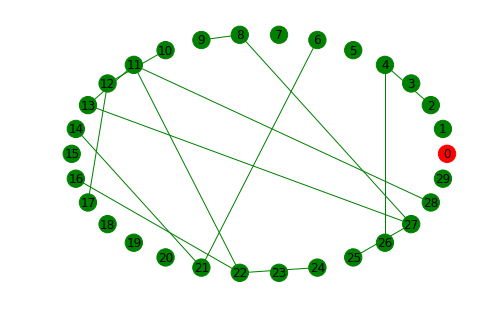

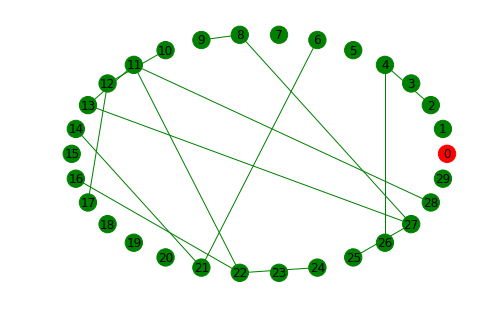

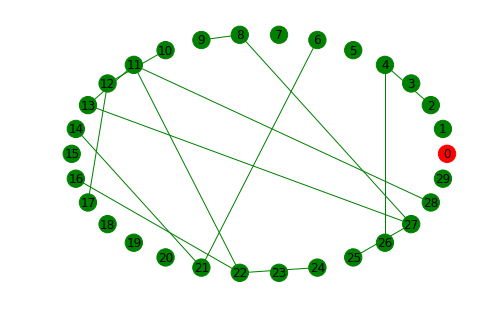

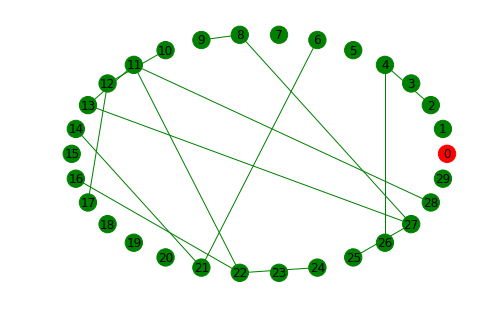

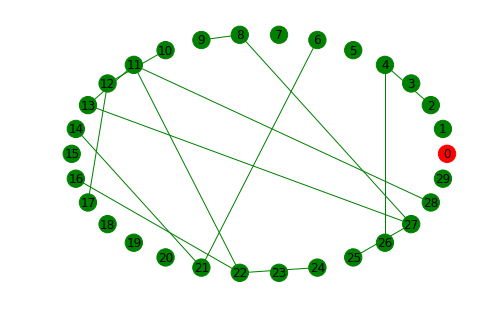

In [11]:
N = 30; p = 0.04;
G_ER = ER_graph(N,p)
color_map = []
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
malades = [malade0]

for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    color_map.append('green') # du coup ils sont tous verts
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
color_map[malade0]='red' # sa couleur est donc rouge

nx.draw_circular(G_ER,node_color = color_map)
plt.show()

nombre_iterations = 10

# proba = 0.3 # C'est la proba que avec un lien, l'autre soit malade

for i in range (nombre_iterations):
    # définir les voisins des malades
    futur_malades = [] 
    for malade in malades :
        voisins = G_ER.neighbors(malade) # on récupère les voisins 
        for voisin in voisins:
            rand = rd.random()
            if G_ER.node[voisin]['etat'] == 'sain' : #and rand < proba :
                G_ER.node[voisin]['etat'] = 'malade' # ils deviennent malades
                futur_malades.append(voisin)
    for personne in futur_malades :
        malades.append(personne) 
            
    # colorer les malades
    for personne in range(N):
        if G_ER.node[personne]['etat'] == 'malade':
            color_map[personne] = 'red'
        else :
            color_map[personne]='green'
    
    #colorer les arretes      
    for edge in range(len(G_ER.edges())):
        arrete = G_ER[G_ER.edges()[edge][0]][G_ER.edges()[edge][1]]
        arrete['color']='green' # toutes les arretes en jaune
        arrete['weight']=1
        if G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' :
            arrete['color']='red'# arrete rouge si les deux personnes sont malades
            arrete['weight']=6
        elif ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'sain' ) or ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'sain' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' ) :
            arrete['color']='orange' # les contaminations possibles en orange
            arrete['weight']=3

    edges = G_ER.edges()
    color_edges = [G_ER[u][v]['color'] for u,v in edges] #on recupere la liste des couleurs
    weights = [G_ER[u][v]['weight'] for u,v in edges]

    #dessiner les networks
    nx.draw_circular(G_ER,node_color = color_map,edge_color=color_edges, width = weights, with_labels = True)
    plt.show()
        
    

## 2.c. Seuil épidémique

[]
[0.01, 0.02, 0.01, 0.03, 0.03, 0.01, 0.02, 0.01, 0.05, 0.34, 0.17, 0.23, 0.04, 0.46, 0.01, 0.68, 0.71, 0.82, 0.64, 0.85, 0.78, 0.77, 0.85, 0.02, 0.93, 0.91, 0.94, 0.86, 0.88, 0.95, 0.93, 0.97, 0.93, 0.97, 0.01, 0.99, 0.99, 0.98, 0.97, 0.97, 0.99, 0.99, 0.99, 0.97, 0.99, 0.99, 0.97, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 1.0, 0.99, 1.0, 0.99, 1.0, 1.0, 1.0, 0.98, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


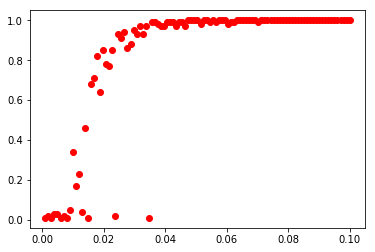

In [63]:
nb_repetitions = 100 # nombre de répétitions de l'expérience
proba_propagation_min = 0.001 # de 0.1%
proba_propagation_max = 0.1 # à 10%
nombre_points = 100
N = 100 # Nombre de personnes 

G_ER = ER_graph(N,p)
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
malades = [malade0]

for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'

nombre_iterations = 10

proba_lien = []
for i in range (nombre_points+1) :
    proba_lien.append(proba_propagation_min + (proba_propagation_max - proba_propagation_min)*(i/nombre_points))
proba_conta = []

indices_a_supprimer = []

for j in range(len(proba_lien)) :
    p = proba_lien[j]
    G_ER = ER_graph(N,p)
    malade0 = 1 #rd.randint(0,N-1) # une personne au hasard sera malade au début
    malades = [malade0]
    
    for i in range (N):
        G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
    
    for i in range (nombre_iterations):
        # définir les voisins des malades
        futur_malades = [] 
        for malade in malades :
            voisins = G_ER.neighbors(malade) # on récupère les voisins 
            for voisin in voisins:
                rand = rd.random()
                if G_ER.node[voisin]['etat'] == 'sain' : #and rand < proba :
                    G_ER.node[voisin]['etat'] = 'malade' # ils deviennent malades
                    futur_malades.append(voisin)
        for personne in futur_malades :
            malades.append(personne) 
    
    nombre_malades = 0
    for i in range(N):
        if G_ER.node[i]['etat'] == 'malade' :
            nombre_malades += 1
    
    
#    if nombre_malades == 1 :
#        indices_a_supprimer.append(j)
#    else :
    proba_conta.append(nombre_malades/N)
    
for indice in indices_a_supprimer :
    del proba_lien[indice]

print(indices_a_supprimer)
print (proba_conta)

plt.plot(proba_lien,proba_conta,'ro')
plt.show()







# 3. SMALL-WORLD NETWORKS

In [20]:
def regular_graph(N=100,k=20):
    # generate a regular ring lattice
    # N : vertices in the returned graph
    # k : degree
    
    adj = np.zeros((N,N)); k+=1;
    for i in range(0,N):
        # select the neighs considering periodicity
        neighs = np.mod(np.arange(0,k)-int(k/2)+i,N);
        adj[i,neighs] = 1; adj[i,i]=0;
    return nx.from_numpy_matrix(adj);

def SW_graph(N=100,k=15,p=.1):
    # generate a small world graph
    # N : # vertices in the returned graph
    # k : degree in the initial regular graph
    # p : probability of modify an edge
    
    # generate a regular graph,
    # save the list of edges that are present and missing 
    G_regular = regular_graph(N,k)
    edges = list(G_regular.edges());
    missing_edges = []
    for i in range(0,N):
        for j in range(i+1,N):
            if (i,j) not in edges:
                missing_edges += [(i,j)]

    adj = np.zeros((N,N))
    tosses = np.random.uniform(size=len(edges));
    for edge_idx in range(0,len(edges)):
        # modify and existing edge with probability p
        if tosses[edge_idx]<p:
            # sample the new edge from the missing ones
            new_edge_idx = np.random.randint(len(missing_edges));
            new_edge = missing_edges[new_edge_idx];
            missing_edges[new_edge_idx] = edges[edge_idx];
            edges[edge_idx] = new_edge;
            adj[new_edge]=1;
        else:
            adj[edges[edge_idx]]=1;
    adj = adj+np.transpose(adj);

    return nx.from_numpy_matrix(adj);


C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

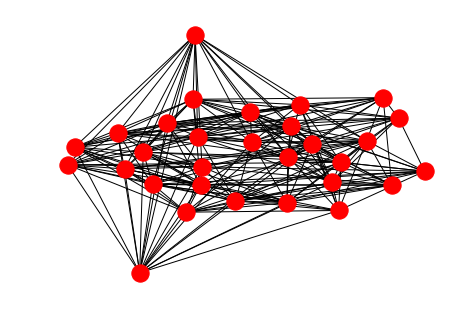

In [31]:
N = 30; k = 15; p = .1;
G_SW = SW_graph(N,k,p)
nx.draw_spring(G_SW)
plt.show()

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

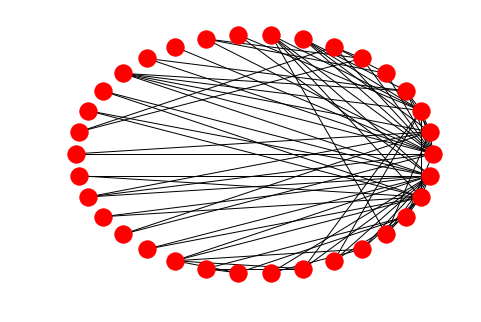

In [48]:
graph = nx.karate_club_graph()
nx.draw_circular(graph)
plt.show()